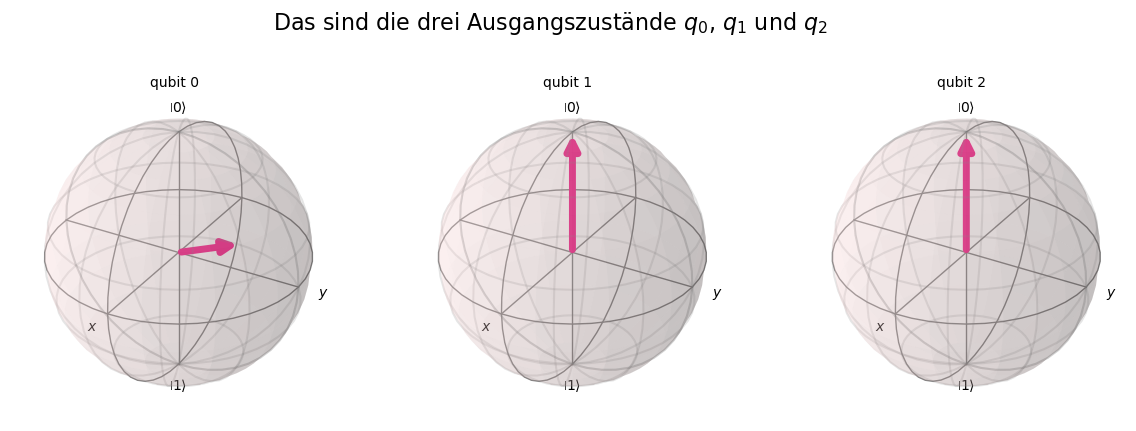

In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute, BasicAer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from math import sqrt, pi

qr = QuantumRegister(3, 'q')
crx= ClassicalRegister(1, 'cx')
crz= ClassicalRegister(1, 'cz')
circuit = QuantumCircuit(qr, crx, crz)
circuit.u(pi / 3, pi / 3, 0, 0)
#circuit.ry(pi / 3, 0)
#circuit.rz(pi / 3, 0)
circuit.barrier()
backend = BasicAer.get_backend('statevector_simulator')
job = execute(circuit, backend).result()
plot_bloch_multivector(job.get_statevector(circuit), title="Das sind die drei Ausgangszustände $q_0$, $q_1$ und $q_2$")

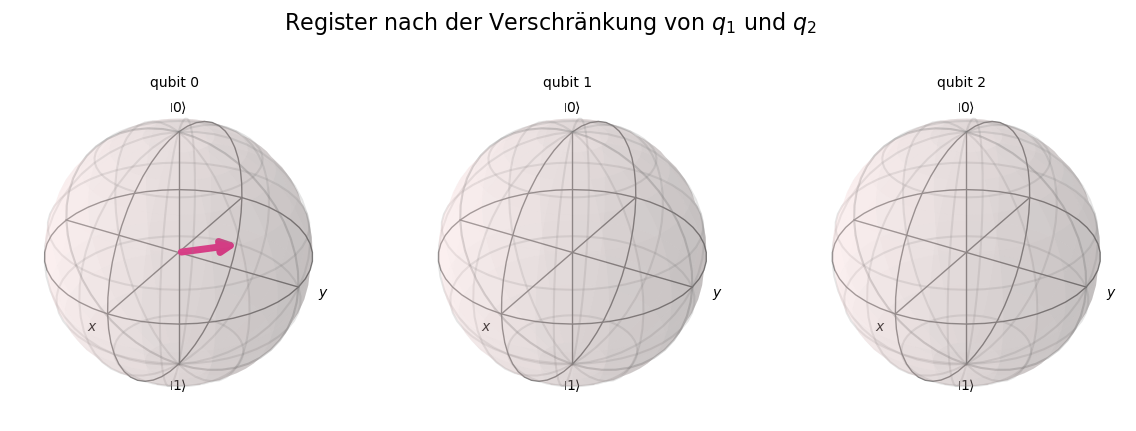

In [3]:
circuit.h(1)
circuit.cx(1, 2)
circuit.barrier()
job = execute(circuit, backend).result()
plot_bloch_multivector(job.get_statevector(circuit), title="Register nach der Verschränkung von $q_1$ und $q_2$")

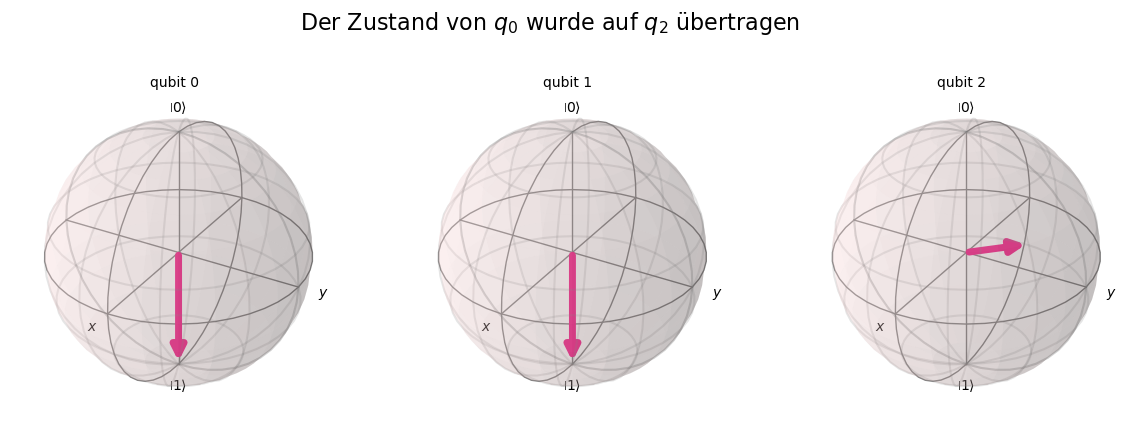

In [4]:
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()
circuit.measure(0, crz)
circuit.measure(1, crx)
circuit.barrier()
circuit.x(2).c_if(crx, 1)
circuit.z(2).c_if(crz, 1)
job = execute(circuit, backend).result()
plot_bloch_multivector(job.get_statevector(circuit), title="Der Zustand von $q_0$ wurde auf $q_2$ übertragen")

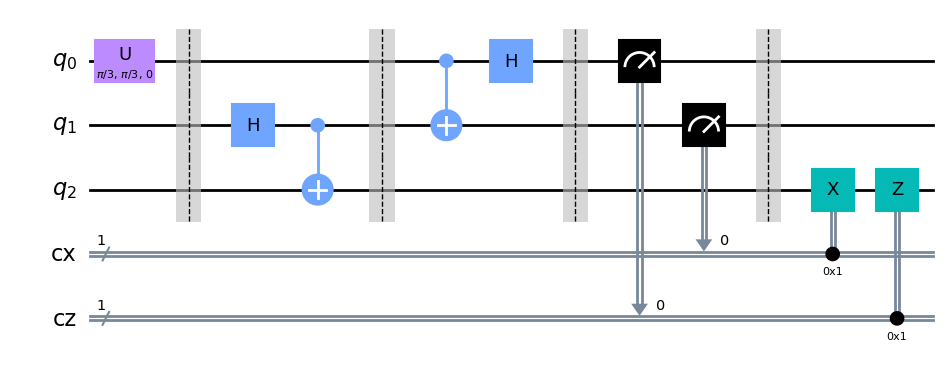

In [5]:
circuit.draw('mpl')